Experimento muy simple solo para ilustrar el funcionamiento del QuantileTransformer cuando se tiene un target de distribución gaussiana.

sklearn.preprocessing.QuantileTransformer:
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer.inverse_transform
1. https://en.wikipedia.org/wiki/Quantile_normalization
1. https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


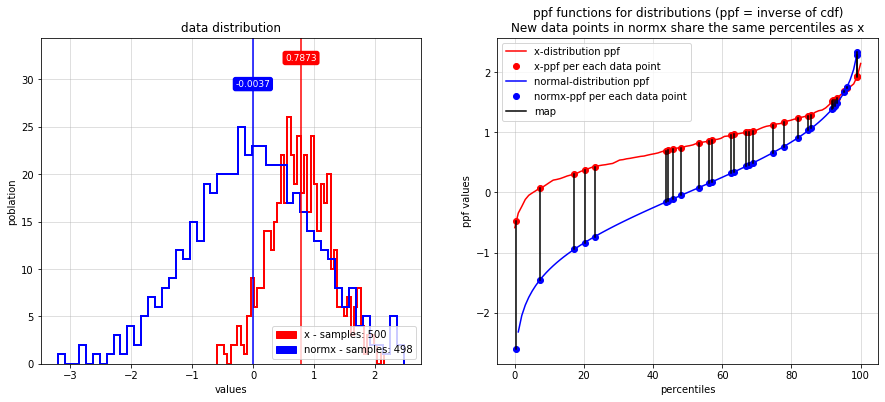

In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
import seaborn as sns
from plots import plot_hist_bins

'''
cdf = cumulative density function
ppf = Percent point function (inverse of cdf — percentiles).
'''

def QuantileNormal(x, n_percentiles):
    # generate the percentiles to evaluate
    x_percentiles = np.linspace(0, 100, n_percentiles)
    
    # get ppf value acording to x-distribution and each percentile
    x_distr_ppf = np.percentile(x, x_percentiles)
    
    # get the interpolated percentile for each data point in x-distribution
    x_percentiles_i = np.interp(x, x_distr_ppf, x_percentiles)
    
    # using the interpolated percentiles, map to standar normal-distribution using the inverse of cdf (norm-ppf)
    # you can use another distribution if you know the cdf/ppf function
    normx = scipy.stats.norm.ppf(x_percentiles_i/100)

    norm_ppf = scipy.stats.norm.ppf(x_percentiles/100) # normal ppf to plot
    normx_percentiles_i = scipy.stats.norm.cdf(normx)*100 # normal ppf to plot
    
    return normx, [x_percentiles, x_distr_ppf, x_percentiles_i, normx_percentiles_i, norm_ppf]

fig, axs = plt.subplots(1, 2, figsize=(15,6))
n = 500
to_plot_points = 30
hist_kwargs = {
    'fig':fig,
    'ax':axs[0],
    'bins':50,
    'cmap':matplotlib.colors.ListedColormap(['r','b'], name=''),
    'title':'data distribution',
    'legend_loc':'lower right',
}

n_quantiles = 100 # or percentiles
x = np.random.RandomState(0).normal(loc=0.8, scale=0.5, size=(n,1)) # generate random data
normx, to_plot = QuantileNormal(x, n_quantiles) # get nromalized data
x_percentiles, x_distr_ppf, x_percentiles_i, normx_percentiles_i, norm_ppf = to_plot

### plots
to_plot = {'x':x, 'normx':normx[~(np.abs(normx)==np.infty)]} # for this example, we don't care for infty values
plot_hist_bins(to_plot, **hist_kwargs)

ax = axs[1]
ax.plot(x_percentiles, x_distr_ppf, '-r', label='x-distribution ppf')
ax.plot(x_percentiles_i[:30], x[:30], 'or', label='x-ppf per each data point')
ax.plot(x_percentiles, norm_ppf, 'b-', label='normal-distribution ppf')
ax.plot(normx_percentiles_i[:30], normx[:30], 'ob', label='normx-ppf per each data point')
for i in range(0,30):
    ax.plot([x_percentiles_i[i], normx_percentiles_i[i]], [x[i], normx[i]], 'k', label='map' if i==0 else None)
ax.grid(alpha=0.5)
ax.set_title('ppf functions for distributions (ppf = inverse of cdf)\nnew data points in normx share the same percentiles as x')
ax.set_xlabel('percentiles')
ax.set_ylabel('ppf values')
ax.legend()